In [1]:
import sys
import torch
from torch.utils.data import TensorDataset
import numpy as np
from matplotlib import pyplot as plt
import logging

sys.path.append("../../")
import manifold_flow as mf
from manifold_flow import transforms, utils, flows, distributions, training
from manifold_flow import nn as nn_

%matplotlib inline

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
logger = logging.getLogger(__name__)
# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)


## Data

In [16]:
n = 10000
x0 = torch.randn(n).view(-1,1)
x1 = 0.5*(1.5 + x0)*(1.5-x0)

x = torch.cat([x0,x1],1)
y = torch.ones(n)
dataset = TensorDataset(x, y)

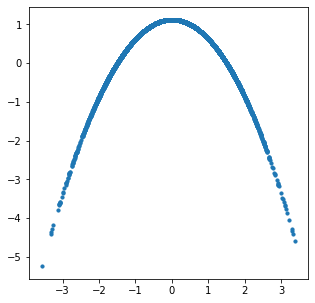

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(x0.numpy(), x1.numpy(), s=10.)
plt.show()

## Model

In [18]:
trf = flows.vector_transforms.create_transform(
    dim=2,
    flow_steps=5,
    linear_transform_type="permutation",
    base_transform_type="affine-coupling",
    hidden_features=20,
    num_transform_blocks=5,
    dropout_probability=0.,
    use_batch_norm=False
)

In [19]:
flow = flows.autoencoding_flow.TwoStepAutoencodingFlow(
    data_dim=2,
    latent_dim=1,
    inner_transform=None,
    outer_transform=trf,
)

09:05 manifold_flow.flows.autoencodi DEBUG   Set up projection from vector with dimension 2 to vector with dimension 1
09:05 manifold_flow.flows.autoencodi DEBUG   Created autoencoding flow with 0.0 M parameters (0.0 M trainable) with an estimated size of 0.0 GB


## Train

In [20]:
x.requires_grad = False
trainer = training.trainer.AutoencodingFlowTrainer(flow)
trainer.train(
    dataset,
    [training.losses.mse],
    epochs=20,
)

09:05 manifold_flow.training.trainer INFO    Training on CPU with single precision
09:05 manifold_flow.training.trainer DEBUG   Initialising training data
09:05 manifold_flow.training.trainer DEBUG   Setting up optimizer
09:05 manifold_flow.training.trainer DEBUG   Setting up LR scheduler
09:05 manifold_flow.training.trainer DEBUG   Using early stopping with infinite patience
09:05 manifold_flow.training.trainer DEBUG   Will print training progress every 2 epochs
09:05 manifold_flow.training.trainer DEBUG   Beginning main training loop
09:05 manifold_flow.training.trainer DEBUG   Training epoch 1 / 50
09:05 manifold_flow.training.trainer DEBUG     Learning rate: [0.001]
09:06 manifold_flow.training.trainer DEBUG   Epoch   1: train loss  0.24501 (mse:  0.245)
09:06 manifold_flow.training.trainer DEBUG              val. loss   0.01211 (mse:  0.012)
09:06 manifold_flow.training.trainer DEBUG   Training epoch 2 / 50
09:06 manifold_flow.training.trainer DEBUG     Learning rate: [0.001]
09:0

KeyboardInterrupt: 

## Learned manifold

In [ ]:
x_reco, log_prob, u = flow(x)
x_gen = flow.sample(n=1000)

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x_reco.detach().numpy()[:,0], x_reco.detach().numpy()[:,1], s=10.)
plt.show()

In [ ]:
u.size()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(u.detach().numpy()[:,0], u.detach().numpy()[:,1], s=10.)
plt.show()

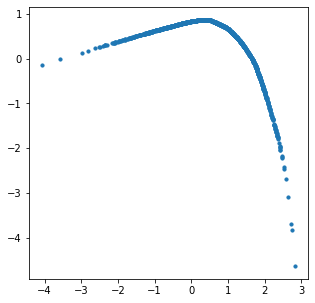

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(x_gen.detach().numpy()[:,0], x_gen.detach().numpy()[:,1], s=10.)
plt.show()